# 経済学の考え方
### スコープ

経済学は限られた資源を最適に活用すること（`maximizing subject to constraints`, 制約付き最大化問題） を考える分野である。この制約付き最大化問題を定式化及び解くにあたって数学手法を用いるが、

1. 経済学的な問題を如何に数学的に表現するか
2. 論理展開した数式から如何に経済学的考え方（economic intuition）を読み取るか

という能力が重要になる。このノートではDixitのOptimization in Economic Theoryをベースに経済学的な考え方と経済学における数学を紹介する。

### プログラミング方針

- 基本的にはnumpy, scipyで完結させる

### Reference

- [consumer optimization and python](https://datascience.quantecon.org/scientific/optimization.html)
- [QuantEcon The Permanent Income Model](https://python.quantecon.org/perm_income.html)



## Index

- [Introduction](#1.-Introduction)
    - [The Arbitrage Argument (1)](#The-Arbitrage-Argument-(1))
- [Lagrange's Method](#2.-Lagrange's-Method)
    - [The Cobb-Douglas Utility Function and Python](#The-Cobb-Douglas-Utility-Function-and-Python)
- [Extensions and generalizations](#3.-Extensions-and-generalizations)
- [Shadow Prices](#4.-Shadow-Prices)
    - [The Permanent Income Model](#The-Permanent-Income-Model)

## 1. Introduction

経済学が扱う制約付き最適化問題はhouseholds' consumption, labor supply, firms' productionなど様々だが、まずconsumer's choiceモデルをスタート点として紹介する。Consumer choice modelにおいて重要なキーワードは、

- a budget line : affordable combination of goodsの集合を示す
- a set of indifference curve

The optimum （最適点）は一般的にはthe budget lineとindifference curveが接する点とされる。

<img src = "https://github.com/RyoNakagami/omorikaizuka/blob/master/Economics/Dixit/Fig_1_1_Dixit.jpg?raw=true">

### 制約付き最適化問題の定式化

- I: Income Level
- $p_A, p_B$: the price levels
- $x_A, x_B$: the consumption levels

としたとき、the budget lineは

$$
p_A x_A + p_Bx_B = I
$$

と表現できる。目的関数はUtility functionと呼ばれ, $U(x_A, x_B)$と表現するとする。The optimumはthe budget lineの制約を満たす財の組み合わせのうち最も高いUtility Levelを生み出す組み合わせとなる: `the preferred bundle is the one that receives the highest utility number`。

### The Arbitrage Argument (1)

The tangency conditionのIntuitionとしてThe Arbitrage Argumentを紹介する。アイデアは、予算制約線上の任意の点を消費者に与え、(1)予算制約を満たす and (2)より高いutility levelの財の組み合わせへ移動させていくというもの。これ以上Utility Levelを改善することができない点に到達したとき、その点がThe Optimumとなっているはずである。

```
The Impossibility of fiding an improvement will serve as the test of optimality.
```

#### The no-arbitrage conditionが必要条件であることの導出

1. the optimum initial allocation, $(x^0_A, x^0_B)$, s.t. $x^0_i > 0$ for all $i \in \{A, B\}$
2. the income, `I`を$I \equiv = p_Ax^0_A + p_Bx^0_B$で定義する
3. BからAの支出額の変化dIについて、$dx^0_A = dI/p_A$, $dx^0_B = -dI/p_B$を考える。これはdIに変化に対して財A, Bがどれくらい増えるのかを表している。このときMarginal Utilityを`MU_i`と表記すると、Utility Levelの変化は

$$
dU = MU_Adx_A + MU_Bdx_B
$$

4. これを$dI$で表記し直す：

$$
dU = (MU_A/p_A - MU_B/p_B)dI
$$

5. (4)がpositiveの場合、$B\to A$への支出調整で消費者はUtility Levelを改善できる。the initial allocationがoptimumだとすると、このことから必要条件が導かれる：

$$
(MU_A/p_A - MU_B/p_B)dI\leq 0
$$

6. (4)がnegativeの場合、(5)と同様のロジックで

$$
(MU_A/p_A - MU_B/p_B)dI\geq 0
$$

よって、the optimumでは

$$
(MU_A/p_A - MU_B/p_B)dI= 0 \tag{1.1}
$$

$$
MU_A/p_A = MU_B/p_B \tag{1.2}
$$

が必要条件となる。

#### REMARKS

- 必要条件はoptimmum candidatesを絞る役割がある
- 必要条件を満たすからといって、必ずしもthe optimumとは限らない（see the second-order sufficient condition）



### Marginal Rate of Substitution, MRS

The Optimumで$x_A$の水準を減らす代わりに、同じUtility levelが達成できるように$x_B$が与えられたとする。このとき、

$$MU_Adx_A = MU_Bdx_B$$

が成立するはずである。よって、

$$
MRS_{AB} = \frac{dx_B}{dx_A} = \frac{MU_A}{MU_B}
$$

The optimumでは(1,2)より$MU_A/p_A = MU_B/p_B$なので、

$$
\frac{MU_A}{MU_B} = \frac{p_A}{p_B}
$$

### Marginal Utility of Income

$dI$のIncomeが新たに付与されたとする。このとき消費者は$MU_A\times (dI/p_A)$または$MU_B\times (dI/p_B)$のいずれかによってUtility incrementを享受するが(1.2)よりどの財にincremental incomeを割り当てるかはindifferentであることがわかる。Marginal Utility of Incomeを$\lambda$とすると、

$$
\lambda = \frac{MU_A}{p_A} = \frac{MU_B}{p_B}
$$

後々に、shadow price, Lagrange Multiplierと関連づけて説明する。

### Corner solutionとMarginal Utility of Income

n-goods problemを考える。仮にthe optimumが$x_i > 0$ for all $i \in \{1, .., N\}$の場合、

$$
\lambda  = \frac{MU_i}{p_i} \text{ for all }i \in \{1, .., N\}\tag{1.3}
$$

一方、strictly positiveの条件が満たされない場合（少なくとも一つ以上の財で消費水準が0）

$$
\frac{MU_i}{p_i} \begin{cases}=\lambda & \text{ if } x_i>0\\
\leq \lambda & \text{ if } x_i=0
\end{cases}
$$

### Non-biding Constraints

Incomeが使いきれないほど与えられた消費者を考える。このとき、制約式は不等式となり、

$$
p_Ax_A + p_Bx_B \leq I
$$

この問題の解き方の一つとして`unspent income`なる$x_C$という財を考える。unspent incomeはそれ自体は役に立たないもので、$MU_C \equiv 0$となる。このとき、制約式は

$$
p_Ax_A + p_Bx_B + x_C = I
$$

となる。At the optimumで$x_C>0$の場合、marginal utility of incomeは(1.3)より$\lambda = 0$となる。また(1.3)より財A, Bはmarginal utilityが0になる水準まで消費されることがわかる。

## 2. Lagrange's Method

### Statement of the Problem

制約付き最適化問題をChapter 1のconsumer choice problemに則した形で考える。まずthe choice variableを$x_1, x_2$とする。これを列ベクトルで表現すると：

$$
x = \left(\begin{array}{c}x_1\\x_2\end{array}\right)
$$

最大化する関数のことをthe objective functionといい、ここでは$F(x)$と表記する。制約式は

$$
G(x) = c
$$

- $G(\cdot)$: function
- $c$: a given constant

Chapter 1では$F(x)$はutility function, $G(x) = c$はthe budget constraintとなる。このchapterのゴールは$G(x) = c$を満たす$x$のうち、$F(x)$を最大化する$x = x^*$を見つけること。

### The Arbitrage Argument (2)

とあるtrial pointが与えられ、そこからのinfinitesimal changeを考える。the infinitesimal changeをベクトルを用いて表記すると、

$$
dx = \left(\begin{array}{c}dx_1\\dx_2\end{array}\right)
$$

前章と同様に、ここでは制約式を満たす$x + dx$がより高い目的関数のvalueを導くかどうかを確認しながら進める。

```
Since the change in x is infinitesimal, we can approximate the changes in values in functions of x by the first-order linear terms in their Taylor series.
```

The first-order Taylor approximation of the change in $F(x)$は

$$
dF(x)  = F(x + dx) - F(x) = F_A(x) dx_A + F_B(x) dx_B \tag{2.1}
$$

同様に

$$
dG(x) = G_A(x) dx_A + G_B(x) dx_B\tag{2.2}
$$



次に、the Arbitrage Argumentを用いてoptimality conditionを確認する。A trial pointとして$\bar x > 0$を考える。このときのthe infinitesimal changeは、制約条件を満たさなくてはならないので

$$
G_A(\bar x)dx_A = - G_B(\bar x)dx_B \tag{2.3}
$$

ただし、$G_i(\bar x)>0$とする。このときのcommon valueを$dc(\neq 0)$と表記するとする。(2.3)を変形すると

$$
dx_A = dc/G_A(\bar x)\tag{2.4}
$$

(2.1)に(2.4)を代入すると、

$$
dF(\bar x) = [F_A(\bar x)/G_A(\bar x) - F_B(\bar x)/G_B(\bar x)]dc \tag{2.5}
$$

$\bar x$がthe optimumの場合、$dF(\bar x) = 0$になるはずなので、

$$
F_A(\bar x)/G_A(\bar x) = F_B(\bar x)/G_B(\bar x)\tag{2.6}
$$

これは(1.2)のthe analogとなる。(2.5)のvalueを$\lambda$とすると、

$$
F_j(\bar x) = \lambda G_j(\bar x)\tag{2.7}
$$

$G_A(\bar x) = 0$の場合を考える。このとき、制約条件を満たしたまま$x_A$の消費量を増やすことができるので$F_A(\bar x)>0$ならば、$G_A(x) > 0$ or $F_A(x)=0$となる水準まで消費量を増やすはずである。よって、$G_A(\bar x) = 0$かつ$\bar x$はthe optimumの場合、$F_A(\bar x)=0$となる。

### Lagrange's Method

(2.6), (2.7)と予算制約式がthe optimumのNecesarry conditionsであるがこれはLagrange's methodを用いることで簡単に表現することができる。

$$
L(x, \lambda) = F(x) - \lambda (c - G(x)) \tag{2.8}
$$

(2.8)のFOCsは

$$
F_j(x^*) = \lambda G_j(x^*)
$$

and 

$$
c - G(x^*) = 0
$$


where $x^*$ is the optimum. 注意点は、Lagrange's Methodそれ自体は解の存在と一意性については何も保証を与えていない。

### Constrained optimization with Lagrange multipliers and Python

The objective function is

$$
U(x, y) = 0.8\log(x) + 0.7\log(y)
$$


the constraint is

$$
11x + 13y < 100
$$


In [1]:
import numpy as np
from scipy.optimize import minimize

the objective functionとthe constraintを定義する：

In [2]:
def objective(X):
    x, y = X
    return -(0.8*np.log(x) + 0.7* np.log(y))

def eq(X):
    x, y = X
    return 100 - (11 * x + 13 * y)

In [3]:
res = minimize(objective, [10, 10],
               constraints={'type': 'eq', 'fun': eq},
               method="SLSQP")
res

     fun: -2.157589543960954
     jac: array([-0.16499096, -0.19501224])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([4.8487513 , 3.58951813])

### 必要条件と十分条件の違いをPythonを用いて確認する

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
plt.style.use('ggplot')
%matplotlib inline

次の関数を考える：

$$
f(x) = x^4 - 3x^2
$$

FODは

$$
f_x(x) = 4x^3 - 6x
$$



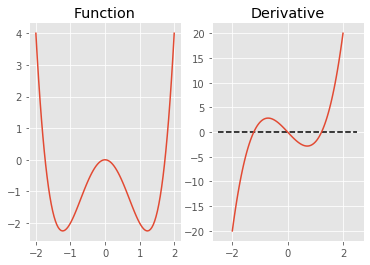

In [5]:
def f(x):
    return x**4 - 3*x**2


def fp(x):
    return 4*x**3 - 6*x

# Create 100 evenly spaced points between -2 and 2
x = np.linspace(-2., 2., 100)

# Evaluate the functions at x values
fx = f(x)
fpx = fp(x)

# Create plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, fx)
ax[0].set_title("Function")

ax[1].plot(x, fpx)
ax[1].hlines(0.0, -2.5, 2.5, color="k", linestyle="--")
ax[1].set_title("Derivative")

for _ax in ax:
    _ax.spines["right"].set_visible(False)
    _ax.spines["top"].set_visible(False)

The minimum valueを特定する：

In [6]:
# For a scalar problem, we give it the function and the bounds between
# which we want to search
neg_min = minimize_scalar(f, [-2, -0.5])
pos_min = minimize_scalar(f, [0.5, 2.0])
print("The negative minimum is: \n", neg_min)
print("The positive minimum is: \n", pos_min)

The negative minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: -1.2247448697638397
The positive minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: 1.2247448697638397


In [7]:
## first order derivative values
print(fp(neg_min.x), fp(pos_min.x))

1.9532992112658576e-08 -1.9532992112658576e-08


このように、the minimumでは一次導関数の値は0となっている。

- ただし、$x=0$でも一次導関数の値は0となるので、必要条件であるが十分条件ではないこともわかる。
- 一次導関数の値が０となる点は三つしかなく必要条件で候補を絞ることができる。

### The Cobb-Douglas Utility Function and Python

The Utility fucntion is described as 
$$
U(x, y) = x^\alpha y^{1-\alpha}
$$

where $\alpha \in [0, 1]$

Text(0.5, 1.0, 'U(x,y)')

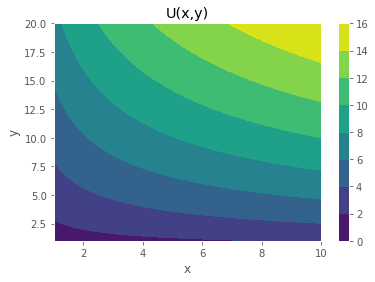

In [8]:
def U(x, y, alpha=1/3):
    return x**alpha * y**(1-alpha)

fig, ax = plt.subplots()
A = np.linspace(1, 10, 100)
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("U(x,y)")

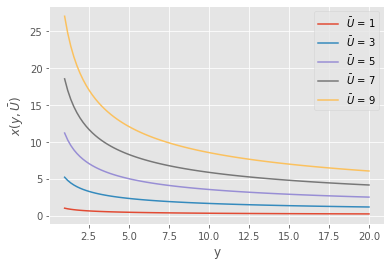

In [9]:
def x_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, x_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("y")
    ax.set_ylabel(r"$x(y, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

次にthe budget constraintを設定する：

$$
2x + y \leq 20
$$

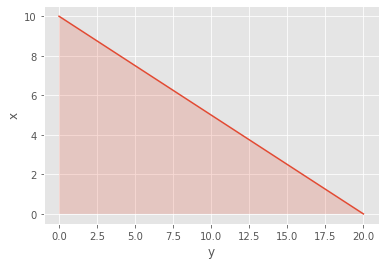

In [10]:
def x_bc(y, W=20, px=2):
    "Given y, W, and px return the max amount of x our consumer can afford"
    return (W - y) / px

def plot_budget_constraint(ax, W=20, px=2):
    y_bc = np.array([0, W])
    X = x_bc(y_bc, W, px)
    ax.plot(y_bc, X)
    ax.fill_between(y_bc, 0, X, alpha=0.2)
    ax.set_xlabel("y")
    ax.set_ylabel("x")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

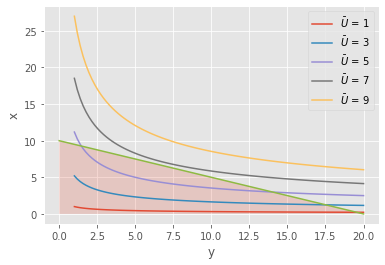

In [11]:
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_budget_constraint(ax)

Lagrange's Methodを用いてとくと

In [12]:
objective = lambda X: - U(X[0], X[1])
res = minimize(objective, [6, 10],
               constraints={'type': 'ineq', 'fun': lambda X: 20- 2*X[0]- X[1]},
               method="SLSQP")
res

     fun: -8.399473614724505
     jac: array([-0.83981621, -0.42000651])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 3.33385405, 13.33229189])

次に`scipy.optimize.minimize_scalar`を用いて解いてみる：

In [13]:
def x_bc(y, W=20, px=2):
    "Given y, W, and px return the max amount of x our consumer can afford"
    return (W - y) / px

def objective(Y, W=20, px=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    X = x_bc(Y, W, px)
    return -U(X, Y)

result = minimize_scalar(objective)
optimal_y = result.x
optimal_x = x_bc(optimal_y, 20, 2)
optimal_U = U(optimal_x, optimal_y)

print("The optimal U is ", optimal_U)
print("and was found at (x,y) =", (optimal_x, optimal_y))

The optimal U is  8.399473665965822
and was found at (x,y) = (3.3333333321742664, 13.333333335651467)


価格の変化と需要の変化を確認する：

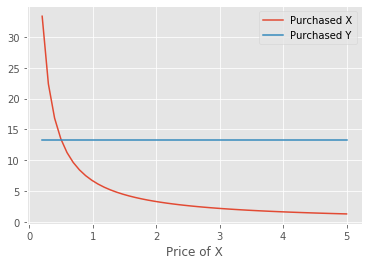

In [14]:
# Create various prices
n_px = 50
prices_x = np.linspace(0.2, 5.0, n_px)
W = 20

# Create lists to store the results of the optimal A and B calculation
optimal_xs = []
optimal_ys = []
for px in prices_x:
    result = minimize_scalar(objective, args=(W, px))
    opt_y_val = result.x

    optimal_ys.append(opt_y_val)
    optimal_xs.append(x_bc(opt_y_val, W, px))

fig, ax = plt.subplots()

ax.plot(prices_x, optimal_xs, label="Purchased X")
ax.plot(prices_x, optimal_ys, label="Purchased Y")
ax.set_xlabel("Price of X")
ax.legend()

## 3. Extensions and generalizations

The choice variable
$$
x = (x_1, ..., x_n)^T
$$

The constraints are

$$
G^i(x) = c_i , \  \ i = 1, ..., m
$$
を考える。また、$m < n$とする。これをLagrange's Methodで表現すると：

$$
L(x, \lambda_1, ..., \lambda_m) = F(x) + \sum^{m}_{i=1}\lambda_i(c_i - G^i(x))\tag{3.1}
$$

### Non-Negative Variables

$x^*$ at the optimumにおいて、$x^*_1 = 0$とする。このような解の存在を許容する場合、FOCsを以下のように修正する必要がある：

$$
L_1 \equiv F_1(x^*) - \sum^m_{i=1}\lambda_iG_1^i(x^*) \leq 0
$$

一般化すると、

$$
L_j(x^*)\leq 0, x^*_j\geq 0\tag{3.2}
$$

(3.2)は以下のように表現されるときもある：

$$
L_j(x^*)x^*_j = 0\tag{3.2}
$$

これはcomplementary slacknessと呼ばれる。（$x^*_j>0$の場合slackという状態という）

```
complementary slackness means that not both of which can be strict.
```



### Inequality Constraints

上述の問題を以下のような不等式に変換する：

$$
G^1(x)\leq c_1
$$

今問題をとくときはchapter 1で見たように`unspent income`の概念を導入する：

$$
x_{n+1} = c_1 - G^1(x)
$$

このときのLagrangeanは

$$
\hat L(x, x_{n+1}, \lambda) = L(x, \lambda) - \lambda_1 x_{n+1}
$$

FOCsは

$$
\frac{\partial \hat L}{\partial x_{n+1}}\equiv - \lambda_1 \leq 0, x_{n+1}\geq 0 \  \ \text{ with complementary slackness}\tag{3.3}
$$

なお

$$
x_{n+1} = c_1 - G^1(x) = \partial L/\partial \lambda_1
$$

に留意すると、

$$
\partial L/\partial \lambda_1 \geq 0, \lambda_1\geq 0 \  \ \text{ with complementary slackness}\tag{3.4}
$$

### Example : Quasi-Linear Preferences

x, yの２財を考える。消費水準はnon-negativeでなければならないとする。それぞれの財の価格は$(p_x, p_y)$で与えられている。Utility functionは

$$
U(x, y) = y + a\log(x)
$$

where a is a given positive constant.

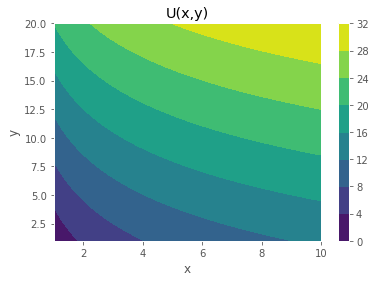

In [15]:
def QLU(x, y, a = 5):
    return y + a*np.log(x)

fig, ax = plt.subplots()
A = np.linspace(1, 10, 100)
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), QLU(A, B))
fig.colorbar(contours)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("U(x,y)");

In [16]:
def eq(x, y, I = 100, px = 20, py = 10):
    return I - px*x - py*y

In [17]:
res = minimize(lambda x: -QLU(x[0], x[1]), [10, 10],
               constraints=[{'type': 'eq', 'fun': lambda x: eq(x[0], x[1])},
                            {'type': 'ineq', 'fun': lambda x: x[0] - 1e-16},
                            {'type': 'ineq', 'fun': lambda x: x[1]}],
               method="SLSQP")
res

     fun: -9.581453656959056
     jac: array([-2.00006223, -1.        ])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.49992235, 5.0001553 ])

#### 財xの所得に対する消費量のPATH

In [18]:
def demand_x(W, px):
    res = minimize(lambda x: -QLU(x[0], x[1]), [10, 10],
               constraints=[{'type': 'eq', 'fun': lambda x: eq(x[0], x[1], I = W, px = px)},
                            {'type': 'ineq', 'fun': lambda x: x[0]},
                            {'type': 'ineq', 'fun': lambda x: x[1]}],
               method="SLSQP")
    return res.x

In [19]:
# Create various prices
n_px = 50
income = np.linspace(10, 500, 1000)

# Create lists to store the results of the optimal A and B calculation
optimal_xs = []
optimal_ys = []
for w in income:
    res = demand_x(w, 5)

    optimal_ys.append(res[1])
    optimal_xs.append(res[0])

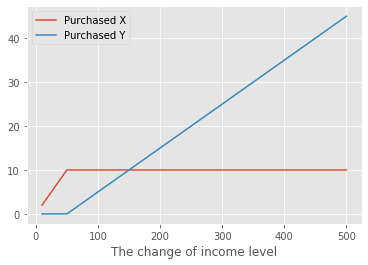

In [20]:
fig, ax = plt.subplots()

ax.plot(income, optimal_xs, label="Purchased X")
ax.plot(income, optimal_ys, label="Purchased Y")
ax.set_xlabel("The change of income level")
ax.legend();

このPATHは解析解とも一致することを確認する。まずLagrangeanを定義する：

$$
L(x, y, \lambda) = y + a\log(x) + \lambda(I-p_xx - p_yy)
$$

FOCs are

$$
a/x - \lambda p_x\leq 0, x\geq 0\tag{3.5}
$$

$$
1 - \lambda p_y\leq 0, y \geq 0\tag{3.6}
$$

$$
I-p_xx - p_yy\geq 0 , \lambda \geq 0 \tag{3.7}
$$

with complementary slackness. それぞれの場合分けは$8 = 2^3$通り考える必要があるが、economic intuitionで絞り込むことができる。

まず、marginal utilityは0になることがないので、（3.7）はslackにはなり得な, i.e., $\lambda > 0$. 仮に$\lambda = 0$が成立したとしても(3.5)より$a/x \leq 0$より矛盾が生じる。(3.6)でも$1\leq 0$という矛盾が生じる。

また、$\lambda >0$より$(x, y) = (0, 0)$は成立不可能になるので、考えるべきは残り三つのケースとなる。

次に、$x = 0, y = I/p_y$を考える。このとき、(3.6)より$\lambda = 1/p_y$, (3.5)より

$$
\frac{p_x}{p_y}\geq \infty
$$

よって矛盾が生じる。残るケースは二つ：

1. $x>0, y = 0$
2. $x>0, y>0$

(1) $x > 0, y = 0$を考える。このとき、$x = I/p_x$, $\lambda = a/I$となる。これを、(3.6)に代入すると

$$
1 \leq \frac{ap_y}{I} \Rightarrow I \leq ap_y
$$

という条件が出てくる。(2)は普通に解けば良いだけなので割愛する。これらの結果以下が得られる：

$$
\begin{cases}
\text{ if  }  I \leq ap_y &  x = I/p_y, y = 0 \\
\text{ otherwise  }  & x = ap_y/p_x, y = I/p_y - a
\end{cases}
$$

Ecoomic intuitionとして、ある一定レベルの所得まではその全てが費やされ、一方そのレベルを超えると所得効果は見られないことから、財xは必需品と考えられる。

### Example: Technological Unemployment

300 units of laborと450 units of landを保有しているEconomyを考える。これら資源を振り分けてwheatとbeefを生産したいとする。

- 1 unit of wheatの生産には2 units of labor and 1 unit of laborが必要
- 1 unit of beefの生産には1 units of labor and 2 unit of laborが必要

wheatとbeefの生産量をそれぞれ`x, y`とすると、

$$
2x + y \leq 300 \tag{3.8} 
$$

$$
x + 2y \leq 450 \tag{3.9} 
$$

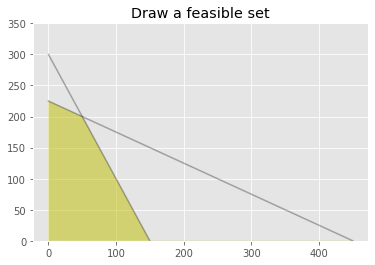

In [21]:
def labor_line(x):
    return 300 - 2*x

def land_line(x):
    return (450 - x)/2

x_range = np.linspace(0, 450, 10000)
y1 = labor_line(x_range)
y2 = land_line(x_range)
y3 = np.minimum(y1, y2)

plt.plot(x_range, y1, color = 'black', alpha = 0.3)
plt.plot(x_range, y2, color = 'black', alpha = 0.3)
plt.fill_between(x_range, 0, y3, facecolor='y',alpha=0.5)
plt.ylim(0, 350)
plt.title('Draw a feasible set');

次に、welfare functionを次のように定義する：

$$
W(x, y) = \alpha \ln(x) + (1 - \alpha)\ln (y)
$$

where $\alpha \in (0, 1)$

The Lagrangean は

$$
L(x, y, \lambda, \mu) = \alpha \ln(x) + (1 - \alpha)\ln (y) + \lambda(300 - 2x - y)+\mu(450 - x - 2y)
$$

FOCs are

$$
\alpha/x - 2\lambda - \mu = 0 \tag{3.10}
$$

$$
(1-\alpha)/y - \lambda - 2\mu = 0 \tag{3.11}
$$

$$
300 - 2x - y \geq 0, \lambda \geq 0 \text{ with  complementary slackness} \tag{3.12}
$$

$$
450 - x - 2y \geq 0, \mu \geq 0 \text{ with  complementary slackness} \tag{3.13}
$$


まず$\lambda = \mu = 0$は$\alpha = 0$となるので除外できる。

Case (1)として$\lambda = 0, \mu > 0$を解く。(3.10), (3.11)より

$$x = \alpha/\mu$$
$$y = (1-\alpha)/(2\mu)$$

これを制約式(3.13)に代入すると、

$$
450 = 1/\mu \Rightarrow \mu = \frac{1}{450}
$$

Then,

$x = 450\alpha, y = 225(1-\alpha)$. (3.12)で実現可能性を検証する：

$$
300 \geq 900\alpha + 225(1-\alpha) \Rightarrow \frac{1}{9} \geq \alpha
$$

Case (2)として$\lambda > 0, \mu = 0$を解くと、同様に、
$$\alpha \geq \frac{1}{3}$$
$$x = 150\alpha, y = 300(1- \alpha)$$

Case (3)として$\lambda > 0, \mu > 0$を解くと、同様に、$$\frac{1}{9}< \alpha < \frac{1}{3}$$
$$x = 50\, y = 200$$

#### Pythonで計算

In [22]:
def welfare_func(x, y, alpha = 0.5):
    return alpha * np.log(x) + (1 - alpha) * np.log(y)

def labor_ineq(x, y):
    return 300 - 2*x - y

def land_ineq(x, y):
    return 450 - x - 2*y


In [23]:
def demand_x(alpha):
    res = minimize(lambda x: -welfare_func(x[0], x[1], alpha = alpha), [1.0, 1.0],
               constraints=[{'type': 'ineq', 'fun': lambda x: labor_ineq(x[0], x[1])},
                            {'type': 'ineq', 'fun': lambda x: land_ineq(x[0], x[1])},
                            {'type': 'ineq', 'fun': lambda x: x[0]},
                            {'type': 'ineq', 'fun': lambda x: x[1]}],
               method="SLSQP")
    return res.x

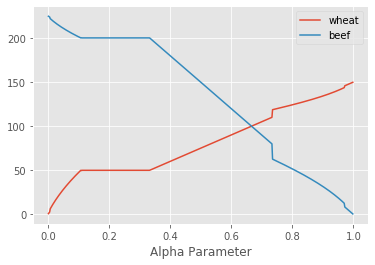

In [24]:
# Create various prices
alpha_range = np.linspace(0, 1, 500)[1:-1]

# Create lists to store the results of the optimal A and B calculation
optimal_xs = []
optimal_ys = []
for alpha in alpha_range:
    res = demand_x(alpha)

    optimal_ys.append(res[1])
    optimal_xs.append(res[0])

fig, ax = plt.subplots()

ax.plot(alpha_range, optimal_xs, label="wheat")
ax.plot(alpha_range, optimal_ys, label="beef")
ax.set_xlabel("Alpha Parameter")
ax.legend();

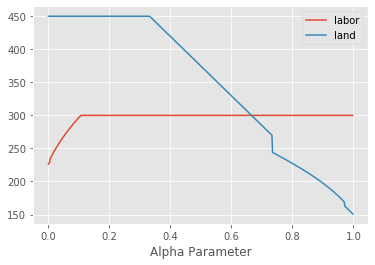

In [25]:
fig, ax = plt.subplots()
ax.plot(alpha_range, 2*np.array(optimal_xs) + np.array(optimal_ys), label="labor")
ax.plot(alpha_range, np.array(optimal_xs) + 2*np.array(optimal_ys), label="land")
ax.set_xlabel("Alpha Parameter")
ax.legend();

#### Economic Intuitions

- $\alpha$が高いほど、wheatをより多く使用する
- パラメター次第では完全雇用が達成されない(生産関数の技術的代替性起因)

### Excercise 3.1: Rationing

以下の効用関数を持つ消費者を考える：

$$
U(x_1, x_2, x_3) = \alpha_1\ln x_1 + \alpha_2\ln x_2 + \alpha_3\ln x_3
$$

where $\sum \alpha_i = 1 $ and $\alpha_i > 0$.

The budget constraint is 

$$
p_1x_1 + p_2x_2 + p_3x_3\leq I
$$

さらに、Rationing constraintとして、

$$
x_1 \leq k
$$

とする。

#### Solution

ラグランジアンを定義する：

$$
L(x, \lambda, \mu) = U(x) + \lambda (I - px) + \mu(k - x_1)
$$

FOCs are

$$
\frac{\partial L}{\partial x_1} = \frac{\alpha_1}{x_1} - p_1\lambda - \mu
$$
$$
\frac{\partial L}{\partial x_2} = \frac{\alpha_2}{x_2} - p_2\lambda
$$
$$
\frac{\partial L}{\partial x_3} = \frac{\alpha_3}{x_3} - p_3\lambda
$$
$$
\frac{\partial L}{\partial \lambda} = I - px
$$
$$
\frac{\partial L}{\partial \mu} = k - x_1
$$



Rationing constraintが存在しない場合の最適解を$x_1^*$としたとき、$k \geq x_1^*$の場合：

$$
x_i = \frac{\alpha_i I}{p_i} 
$$

次に、$k < x_1^*$の場合、complementary slacknessの条件,$(k - x_1)\mu = 0$より

$$
\begin{aligned}
x_1 &= k\\
\frac{1}{\lambda}& = \frac{I - p_1k}{\alpha_2+\alpha_3}\\
x_i &= \frac{\alpha_i(I - p_1k)}{p_i(\alpha_2 + \alpha_3)} \  \ \text{ for } i \in \{2, 3\}
\end{aligned}
$$


### Exercise 3.2: Distribution Between Envious Consumers

Yだけの資源がある経済を考える。consumerは二人存在し、それぞれの効用関数は以下の形をしている：

$$
\begin{aligned}
U_1(Y_1, Y_2) & = Y_1 - kY_2^2\\
U_2(Y_1, Y_2) & = Y_2 - kY_1^2
\end{aligned}
$$

Constraintは以下：

$$
Y_1 + Y_2 \leq Y
$$

- $U_1 + U_2$を最大化するような$(Y_1, Y_2)$の組み合わせを考える
- k = 1/10としたとき、Yの変化に対して$Y_1 + Y_2$がどのように変化するかplotする

In [26]:
def obj(x, y):
    k = 1/10
    return x + y - k*(x**2 + y**2)

def constraint(x, y, Y):
    return Y - x - y

def demand(resource):
    res = minimize(lambda x: - obj(x[0], x[1]), [1.0, 1.0],
               constraints=[{'type': 'ineq', 'fun': lambda x: constraint(x[0], x[1], Y = resource)},
                            {'type': 'ineq', 'fun': lambda x: x[0]},
                            {'type': 'ineq', 'fun': lambda x: x[1]}],
               method="SLSQP")
    return np.sum(res.x)

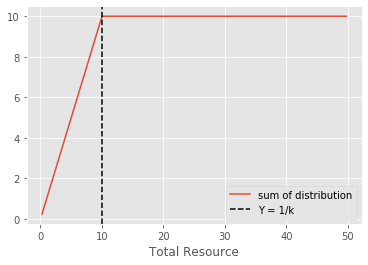

In [27]:
# Create various prices
resource_range = np.linspace(0, 50, 200)[1:-1]

# Create lists to store the results of the optimal A and B calculation
optimal= []
for r in resource_range:
    res = demand(r)

    optimal.append(res)

fig, ax = plt.subplots()

ax.plot(resource_range, optimal, label="sum of distribution")
plt.axvline(x=10, color='k', linestyle='--', label = 'Y = 1/k')
ax.set_xlabel("Total Resource")
ax.legend();

## 4. Shadow Prices

### Equality ConstraintとLagrangian Multiplerの解釈

経済学では外生変数を変化させたとき、optimal choiceがどのように変化するのかを分析する比較静学（comparative statics）という分野がある。Lagrangian Multiplerはこの比較静学の観点から解釈できることを確認する。

２財モデル$(x_1, x_2)$でobjective functionを$F(x)$, 制約式を$G(x) = c$、optimal choiceを$x^*$とする。このとき、$c$が$dc$だけ増加して、optimal choiceが$x^* + dx^*$、optimal valueが$v + dv$となった場合を考える。

このとき、$dv$はTaylor approximationを用いると以下のように近似できる：

$$
\begin{aligned}
dv &= F(x^* + dx^*) - F(x^*)\\
& = F_1(x^*)dx^*_1 + F_2(x^*)dx^*_2\\
& = \lambda[G_1(x^*)dx^*_1 + G_2(x^*)dx^*_2]\\
& = \lambda (G(x^* + dx^*) - G(x^*))\\
& = \lambda[(c + dc) - c] = \lambda dc 
\end{aligned}
$$

Then,

$$
\frac{dv}{dc} = \lambda \tag{4.1}
$$

### Shadow Prices

次のような2財モデルの経済を考える。Welfare functionは$F(x_1, x_2)$. $(x_1, x_2)$の生産にはlaborとland, $(L, T)$, が必要で制約式は

$$
\begin{aligned}
G^L(x) &\leq L \\
G^T(x) &\leq T
\end{aligned}
$$

optimal choiceはfull employmentの状況を仮定する。あるとき、外生的に$dL$だけlabourが増加したとする。またlabour, landそれぞれのLagrange Multiplerを$\lambda, \mu$とする。このとき、

$$
dL = G^L_1(x^*)dx_1 + G^L_2(x^*)dx_2
$$

$dL$の増加分をi財に割り当てたとすると

$$
dx^*_i = dL/G^L_i(x^*)
$$

よってsocial welfareの増加は

$$
dv = F_i(x^*)dx^*_i = [F_i(x^*)/G^L_i(x^*)]dL
$$

内点解のoptimality conditionより

$$
\lambda = [F_i(x^*)/G^L_i(x^*)] \  \ \text{ for all } i\in\{1, 2\}
$$

なのでlabourのmargianlな増加によるsocial welfareの増加は$\lambda$ということがわかる。

次にlaborの増加はlandの使用を諦めなくてはならないという状況を考える。上と同様の議論でlandのmargialな増加によるsocial welfareの増加は$\mu$.

よって、labourとlandのtrade-offによるsocial welfareの変化は

$$
dv = \lambda dL + \mu dT  \tag{4.2}
$$

と表せる。Social plannerがdLに対して犠牲にできるdTの最大量は

$$
\lambda dL + \mu dT  = 0
$$

なので、$(\lambda/\mu)dL$とわかる。$(\lambda/\mu)$をlandに対するlabourの価格という。


#### REMARKS

- `The multipliers measures the increase in social welfare resulting from increased availability of scarce resources.`
- Shadow pricesはmarginal value products of the resources

### Example: The Invisible Hand - Distribution

Social Plannerの観点から次の問題を考える。

- C人の消費者が存在。各消費者は$c = 1, ..., C$でラベルされている
- G種類の財が存在。各財は$g = 1, ..., G$でラベルされている
- $X_g$: 経済に存在する財gの総量
- $x_{cg}$: 消費者cに割り当てられた財gのquantity

各消費者のutility functionは

$$
u_c = U^c(x_{c1}, ..., x_{cG})
$$

Social welfare functionは

$$
w = W(u_1, ..., u_C)
$$


The constraint is

$$
\sum_{i = 1}^C x_{ig} = X_g \text{ and }x_{ig} \geq 0,\  \  \forall i \in \{1,..., C\} \  \ \forall g \in \{1, ..., G\}
$$

ここでLagrangeanを定義すると：

$$
L = W(u_1, ..., u_C) + \sum_g^G \pi_g [X_g - \sum^C_c x_{cg}]
$$

FOC with respect to $x_{cg}$は

$$
\frac{\partial W(u_1, ..., u_C)}{\partial u_c}\frac{\partial u_c}{\partial x_{cg}} - \pi_g = 0\tag{4.3}
$$



次に、この$\pi_g$を財gの価格とする。そして、各消費者に所得$I_c$が与えられているケースを考える。また、各消費者は各自のutility functionを最大化する形で財の消費量を各自が選択するとする。

このとき、各消費者のthe budget constraintは

$$
\sum_g\pi_gx_{cg} = I_c
$$

FOCsは

$$
\frac{\partial u_c}{\partial x_{cg}} = \lambda_c \pi_g\tag{4.4}
$$

$\lambda_c$は消費者cのmarginal utility of incomeである。(4.3), (4.4)を比較すると、以下の場合二つのresource allocationが一致する：

$$
\frac{\partial W}{\partial u_c} = \frac{1}{\lambda_c}\tag{4.5}
$$

#### REMARKS

後者のケースでSocial welfareを最大化する資源配分を実現するためには、

```
the distribution of income should be arrangeed such that ast the margin the social value of every consumer's income is the same.
```

### Example: Duty-Free Purchases

- n brandsのお酒がduty-freeで販売されている
- $\mathbf p$: vector of duty-free prices
- $\mathbf q$: vector of normal prices
- $\mathbf p << \mathbf q$

消費者はduty-freeと普通の酒屋でお酒を買うがそれぞれのベクトルを$\mathbf x, \mathbf y$. The budget constraintは

$$
\mathbf p\cdot \mathbf x + \mathbf q\cdot \mathbf y\leq I
$$

duty-freeで購入できるお酒の本数は制限があり、

$$
\mathbf 1 \cdot \mathbf x \leq K
$$

Utilityはお酒の消費量, $c = x + y$, で定まるとし、お酒をどのショップで買ったかは関係ないとする。

Lagrangeanは

$$
L = U(\mathbf c) + \lambda [I - \mathbf p\cdot \mathbf x + \mathbf q\cdot \mathbf] + \mu [K - \mathbf 1 \cdot \mathbf x]
$$

FOCS are with complementary slackness

$$
\frac{\partial L}{\partial x_j}\equiv \frac{\partial U}{\partial c} - \lambda p_j  - \mu \leq 0, x_j\geq 0\tag{4.6}
$$

$$
\frac{\partial L}{\partial y_j}\equiv \frac{\partial U}{\partial c} - \lambda q_j\leq 0, y_j \geq 0\tag{4.7}
$$


Inequalitry pairsは$2^{2n}$ patternあるがEconomic intuitionsで探索範囲を絞ることができる。まず、2つ以上のブランドで$x_j, y_j$が共にstrictly positiveになる可能性があるか検証する。(4.6), (4.7)より、

$$
\lambda p_j -\mu = \lambda q_j \Rightarrow q_j - p_j = \frac{\mu}{\lambda}
$$

brand j = 1, 2で$x_j, y_j$が共にstrictly positiveになるときの必要条件は

$$
q_1 - p_1 = q_2 - p_2
$$

- the absolute price differenceが同じ財がない場合、二つ以上のブランドで$x_j, y_j$が共にstrictly positiveになることはない
- the absolute price differenceがoptimal choiceに関係してくる

実際に、$x_j > 0, y_j = 0$となる条件は

$$
q_j - p_j > \frac{\mu}{\lambda}
$$

### The Permanent Income Model

An infinite-horizon linear-quadratic savings problemをPythonで記述する。

importsは以下：

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import random
from numba import njit

#### The Savings Problem

ここではマルチンゲール確率過程 (i.e., a sequence of random variables)に準拠する。A discrete-time martingaleとは各t期の確率変数のmeanがfiniteで

$$
\mathbb E_t[X_{t+1}] = X_t, \  \ t = 0, 1, 2, ...
$$

```
Martingales have the feature that the history of past outcomes provides no predictive power for changes between current and future outcomes.
```

- random walks族もマルチンゲール確率過程クラスに属する


#### The Decision Problem

The objective function is

$$
\mathbb{E}_0 \left[ \sum_{t=0}^\infty \beta^t u(c_t) \right] \tag{4.8}
$$

- $c_t$: time t consumption
- $u(\cdot)$: a strictly concave one-period utility function
- $\beta \in (0, 1)$: a discount factor

a consumption, borrowing plan, $\{c_t, b_{t+1}\}_{t=0}^\infty$, の制約式は

$$
c_t + b_t = \frac{1}{1 + r} b_{t+1} +  y_t   \quad t \geq 0\tag{4.9}
$$

- $y_t$: an exogenous endowment process.
- $r>0$: a time-invariant risk-free net interest rate.
- $b_t$:  one-period risk-free debt maturing at t
- $b_0, y_0$は外生的に予め与えられている

#### Assumptions

1. $(1 + r)^{-1} = \beta$
2. the endowment process: the state-space representation

$$
\begin{align}
z_{t+1} &= Az_t + Cw_{t+1}\\
y_t&= Uz_t\tag{4.10}
\end{align}
$$

where

1. $\{w_t\}$: an IID vector process with $\mathbf E[w_t] = 0$ and $\mathbf E[w_tw_t']= I$
2. The spectral radius of $A$ satisfies $\rho(A)<\sqrt{1/\beta}$

(2)の制約はincomeが発散しないようにするための仮定。

#### The quadratic utility function

$$
u(c_t) = -(c_t - \gamma)^2\tag{4.11}
$$

where $\gamma$ is a bliss level of consumption.

#### No Ponzi scheme condition

$$
\mathbb{E}_0 \left[ \sum_{t=0}^\infty \beta^t b_t^2 \right] < \infty \tag{4.12}
$$

よくみる形は

$$
 b_0 + \sum_{t=0}^\infty \frac{c_t}{(1+r)^t} =\sum_{t=0}^\infty \frac{y_t}{(1+r)^t}
$$


#### FOCs

The Lagrangian Problem is

$$
L(c, \lambda) = \mathbb{E}_0 \left[ \sum_{t=0}^\infty \beta^t u(c_t) \right] + \lambda \left( \sum_{t=0}^\infty \frac{y_t}{(1+r)^t} - b_0 + \sum_{t=0}^\infty \frac{c_t}{(1+r)^t}\right)
$$

Then,

$$
\frac{\partial L}{\partial c_t} = \beta^t\mathbf E_0[u'(c_t)] - \lambda \frac{1}{(1+r)^t} = \beta^t( E_0[u'(c_t)] - \lambda)
$$

よって、Euler Equationsは

$$
\mathbb{E}_t [u'(c_{t+1})] = u'(c_t) , \qquad t = 0, 1, \ldots \tag{4.13}
$$

(4.11)のようにutility functionと特定したので

$$
\mathbf E_t[c_{t+1}]= c_t \tag{4.14}
$$


#### The Optimal Decision Rule

(4.12)より$\lim_{t \to \infty} \beta^{\frac{t}{2}} b_{t+1}= 0$を得る。これを用いると、

$$
b_t = \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j}) \tag{4.15}
$$

(4.15)について、conditional expectationsをとり、the martingale property of consumption and the law of iterated expectations を利用すると

$$
b_t = \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - \frac{c_t}{1-\beta} \tag{4.16}
$$

Then、

$$
c_t
 = (1-\beta) \left[ \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - b_t\right]
 = {r \over 1+r} \left[ \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - b_t\right] \tag{4.17}
$$

(4.10)と[この議論](https://python.quantecon.org/linear_models.html#lm-fgs)より、

$$
\sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}]
= \mathbb{E}_t \left[ \sum_{j=0}^\infty \beta^j y_{t+j} \right]
= U(I - \beta A)^{-1} z_t
$$

(4.17)に代入すると、

$$
c_t
 = {r \over 1+r}
     \left[
         U(I - \beta A)^{-1} z_t - b_t
     \right] \tag{4.18}
$$

また、制約式に代入すると、

$$
\begin{aligned}
    b_{t+1}
    & = (1 + r) (b_t + c_t - y_t)
    \\
    & = (1 + r) b_t + r [ U(I - \beta A)^{-1} z_t - b_t]  - (1+r) U z_t
    \\
    & = b_t +  U [ r(I - \beta A)^{-1}  - (1+r) I ]  z_t
    \\
    & = b_t +  U (I - \beta A)^{-1} (A - I)   z_t
\end{aligned}
$$



#### A State-Space Representation

上述の議論を整理すると、

$$
\begin{aligned}
  z_{t+1} & = A z_t + C w_{t+1} \\
  b_{t+1} & = b_t + U [ (I -\beta A)^{-1} (A - I) ] z_t \\
      y_t & = U z_t \\
      c_t & = (1-\beta) [ U(I-\beta A)^{-1} z_t - b_t ]
\end{aligned} \tag{4.19}
$$

Notationsを以下のように整理する：

$$
x_t =
\begin{bmatrix}
    z_t\\
    b_t
\end{bmatrix},
\quad
\tilde A =
\begin{bmatrix}
    A & 0 \\
    U(I-\beta A)^{-1}(A-I) & 1
 \end{bmatrix},
 \quad
\tilde C =
\begin{bmatrix}
    C\\
    0
\end{bmatrix}
$$
and
$$
\tilde U =
\begin{bmatrix}
    U & 0 \\
    (1-\beta) U (I - \beta A)^{-1} & -(1-\beta)
\end{bmatrix}, \quad
\tilde y_t =
\begin{bmatrix}
      y_t\\
      c_t
  \end{bmatrix}
$$
Then,
$$
\begin{aligned}
  x_{t+1} & = \tilde A x_t + \tilde C w_{t+1} \\
  \tilde y_t & = \tilde U x_t
\end{aligned} \tag{4.20}
$$

(4.20)にconditional expectationsをとると

$$
\mathbf E_t[x_{t+1}] = \mathbf E_t[\tilde A x_t + \tilde C w_{t+1}] = \tilde A \mathbf E_t[x_{t}]\tag{4.21}
$$

the covariance $\Sigma_t \equiv  \mathbb{E} [ (x_t - \mu_t) (x_t - \mu_t)']$とすると

$$
\Sigma_{t+1}  = \tilde A  \Sigma_t \tilde A' + \tilde C \tilde C'
\quad \text{with} \quad \Sigma_0 \text{ given} \tag{4.22}
$$

同様に

$$
\begin{aligned}
\mu_{y,t} = \tilde U \mathbf E_t[x_{t}] \\
\Sigma_{y,t} = \tilde U \Sigma_t \tilde U'
\end{aligned} \tag{4.23}
$$

#### A Simple Example with IID Income

- $\{w_t\}_{t=1}^\infty$: IID and scalar standard normal
- $b_0 = z_0^1 = 0$

$$
z_t =
\begin{bmatrix}
    z^1_t \\
    1
\end{bmatrix},
\quad
A =
\begin{bmatrix}
    0 & 0 \\
    0 & 1
\end{bmatrix},
\quad
U =
\begin{bmatrix}
    1 & \mu
\end{bmatrix},
\quad
C =
\begin{bmatrix}
    \sigma \\
    0
\end{bmatrix}
$$

この設定では

$$
y_t\sim N(\mu, \sigma^2)
$$

and

$$
\begin{aligned}
    b_t & = - \sigma \sum_{j=1}^{t-1} w_j
    \\
    c_t & = \mu + (1 - \beta) \sigma \sum_{j=1}^t w_j
\end{aligned}
$$

よって、 income is IID and debt and consumption are both Gaussian random walks.

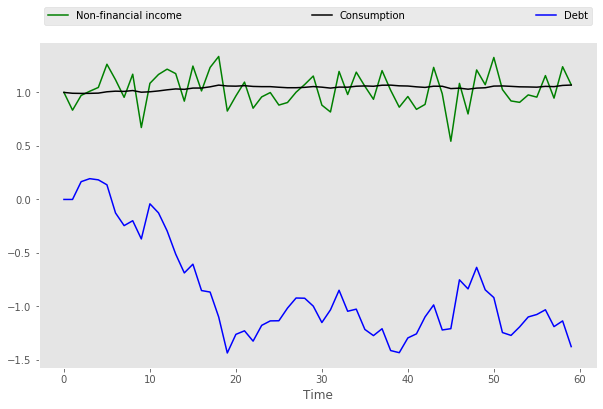

In [29]:
r = 0.05
β = 1 / (1 + r)
σ = 0.15
μ = 1
T = 600
small_t = 60

np.random.seed(1212)

@njit
def time_path(T):
    w = np.random.randn(T+1)  # w_0, w_1, ..., w_T
    w[0] = 0
    b = np.zeros(T+1)
    for t in range(1, T+1):
        b[t] = w[1:t].sum()
    b = -σ * b
    c = μ + (1 - β) * (σ * w - b)
    return w, b, c

w_T, b_T, c_T = time_path(T)
w, b, c = w_T[:small_t], b_T[:small_t], c_T[:small_t]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(μ + σ * w, 'g-', label="Non-financial income")
ax.plot(c, 'k-', label="Consumption")
ax.plot( b, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

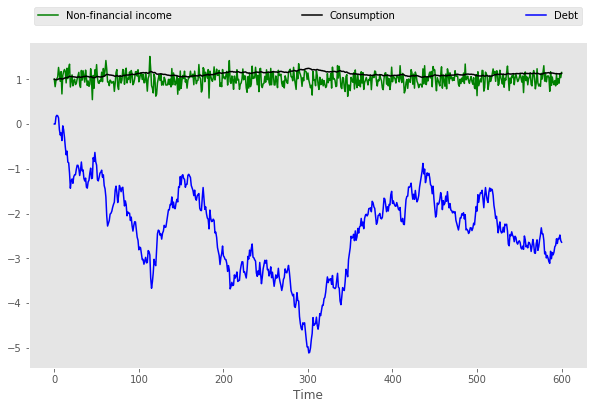

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(μ + σ * w_T, 'g-', label="Non-financial income")
ax.plot(c_T, 'k-', label="Consumption")
ax.plot( b_T, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

250人のconsumerのconsumption, borrowing bundleをplotする：

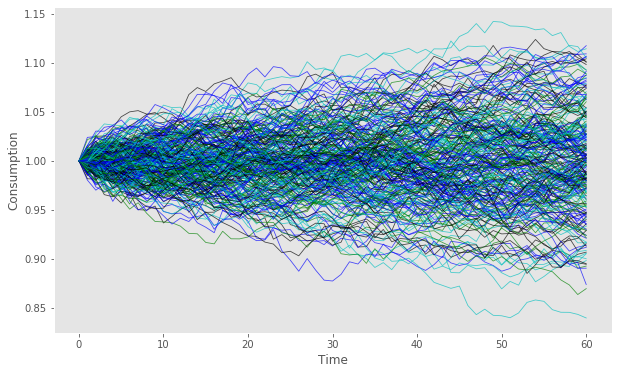

In [31]:
np.random.seed(1212)

fig, ax = plt.subplots(figsize=(10, 6))

b_sum = np.zeros(small_t+1)
for i in range(250):
    w, b, c = time_path(small_t)  # Generate new time path
    rcolor = random.choice(('c', 'g', 'b', 'k'))
    ax.plot(c, color=rcolor, lw=0.8, alpha=0.7)

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption')

plt.show()